# Faculty_Notebook - Day02

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")


import os
#os.chdir('C:\\Users\\DILIP\\Downloads')



**EDA:**

In [3]:
data = pd.read_csv('2Classdata.csv')
data.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
195,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,Abnormal
42,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843,Abnormal
40,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
296,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980,Normal


In [4]:
for col in data.columns:
    data.loc[data['class'] == 'Abnormal', 'class'] = 0
    data.loc[data['class'] == 'Normal', 'class'] = 1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
data.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
149,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,0
244,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1
287,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,0
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,0


In [7]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**Let's check the correlations between the features :**

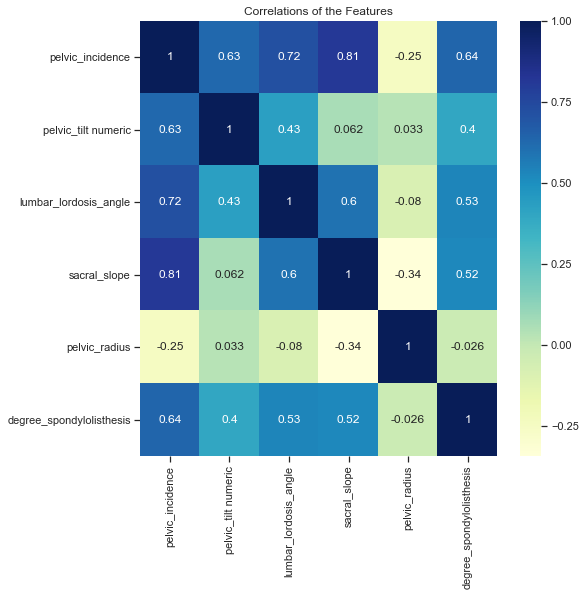

In [8]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

Let's see how many target classes we have in our data:

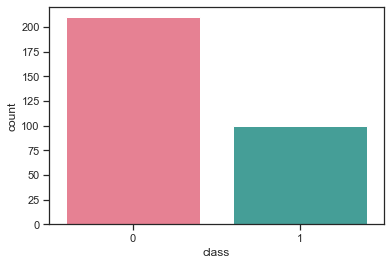

In [9]:
sns.countplot(data['class'], palette='husl')
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

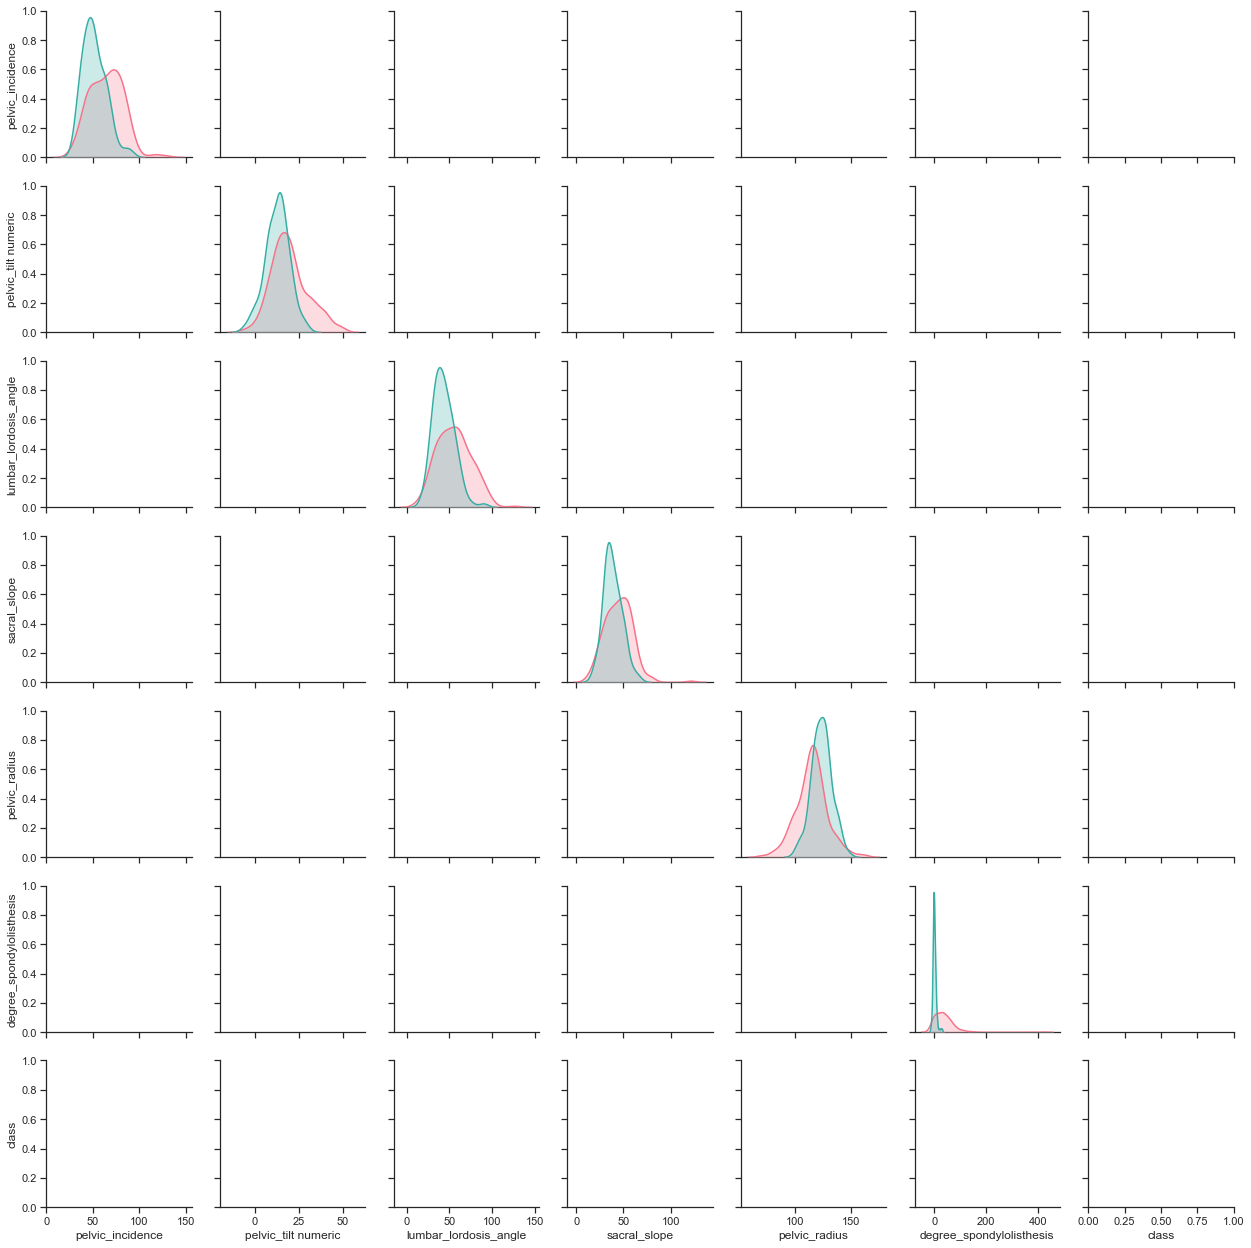

In [12]:
i = sns.pairplot(data ,hue='class',diag_kind='kde', palette='husl')
plt.show()

**CREATING THE DATA SET:**

In [ ]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:6]
df.head(3)

Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm:

* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

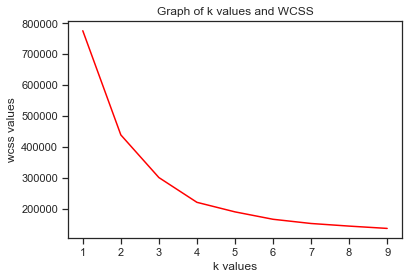

In [42]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

**K-Means Clustering Algorithm:**

In [43]:
# Now we know our best k value is 2/3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=2)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

In [47]:
print('Original Data Classes:')
print(data['class'].value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
0    210
1    100
Name: class, dtype: int64
------------------------------
Predicted Data Classes:
0    200
1    110
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

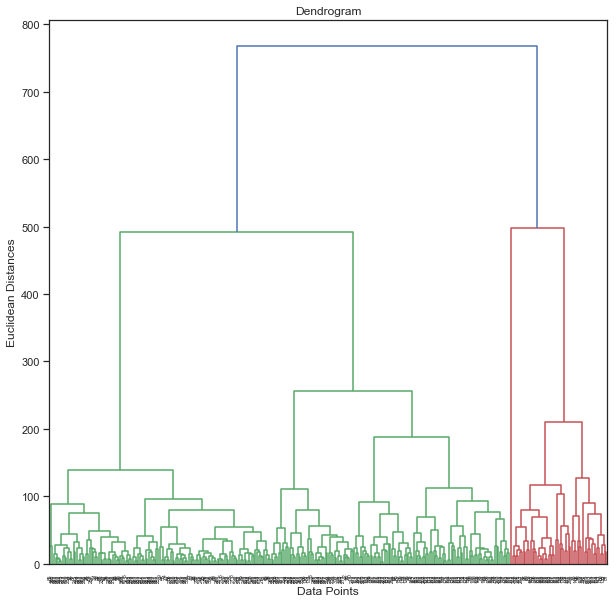

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

**Hierarchical Clustering Algorithm:**

In [49]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

**Comparing Original, K-Means and Hierarchical Clustered Classes:**

In [51]:
print('Original Data Classes:')
print(data['class'].value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
0    210
1    100
Name: class, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    200
1    110
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
1    256
0     54
Name: label, dtype: int64


We can see our models' differences from the comparision of our algorithms' class counts.



## Build An Classification model :-

## K-Means

In [52]:
df_k.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,label
179,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,1
101,79.938570,18.774071,63.311835,61.164499,114.787107,38.538741,1
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,0
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,0


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [53]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [54]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [55]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9953917050691244
Validation Accuracy  ::  0.946236559139785


In [58]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.97      0.89      0.93        38

    accuracy                           0.95        93
   macro avg       0.95      0.94      0.94        93
weighted avg       0.95      0.95      0.95        93



## Random Forest

In [59]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  1.0
Validation Accuracy  ::  0.978494623655914


In [61]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9953917050691244
Validation Accuracy  ::  0.9354838709677419


In [63]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.97      0.87      0.92        38

    accuracy                           0.94        93
   macro avg       0.94      0.93      0.93        93
weighted avg       0.94      0.94      0.93        93



## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [64]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [65]:
x_standardize = x.apply(zscore)

In [66]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [68]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [73]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [74]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [75]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


--------------------

## Agglomerative clustering

In [77]:
df_h.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
181,12.46,13.41,0.8706,5.236,3.017,4.9870,5.147,0
99,18.72,16.34,0.8810,6.219,3.684,2.1880,6.097,1
36,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,2
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,0
130,18.30,15.89,0.9108,5.979,3.755,2.8370,5.962,1


In [78]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [79]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [80]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [83]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [84]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [86]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [88]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [91]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [92]:
x_standardize = x.apply(zscore)

In [93]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [94]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [95]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [96]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [97]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


-------------------------

# ---------------------------------- HAPPY LEARNING ---------------------------------------------